In [1]:
import os
import matplotlib.pyplot as plt

In [150]:
ds = '/kaggle/working/plantvillage_augmented'

In [151]:
class_counts = {}
for class_name in os.listdir(ds):
    class_path = os.path.join(ds, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        class_counts[class_name] = num_images

In [152]:
class_counts = dict(sorted(class_counts.items(), key=lambda x: x[1], reverse=True))

In [153]:
unwanted = ["Potato", "Pepper"]
for name in list(class_counts.keys()):
    if any(plant in name for plant in unwanted):
        class_counts.pop(name)

In [154]:
for cls, count in class_counts.items():
    print(f'{cls}: {count} images')

Tomato__Tomato_mosaic_virus: 3227 images
Tomato__Tomato_YellowLeaf__Curl_Virus: 3208 images
Tomato_Late_blight: 3200 images
Tomato_Leaf_Mold: 3200 images
Tomato_Spider_mites_Two_spotted_spider_mite: 3200 images
Tomato_healthy: 3200 images
Tomato_Bacterial_spot: 3200 images
Tomato_Septoria_leaf_spot: 3200 images
Tomato__Target_Spot: 3200 images
Tomato_Early_blight: 3200 images


# **Class Distribution**

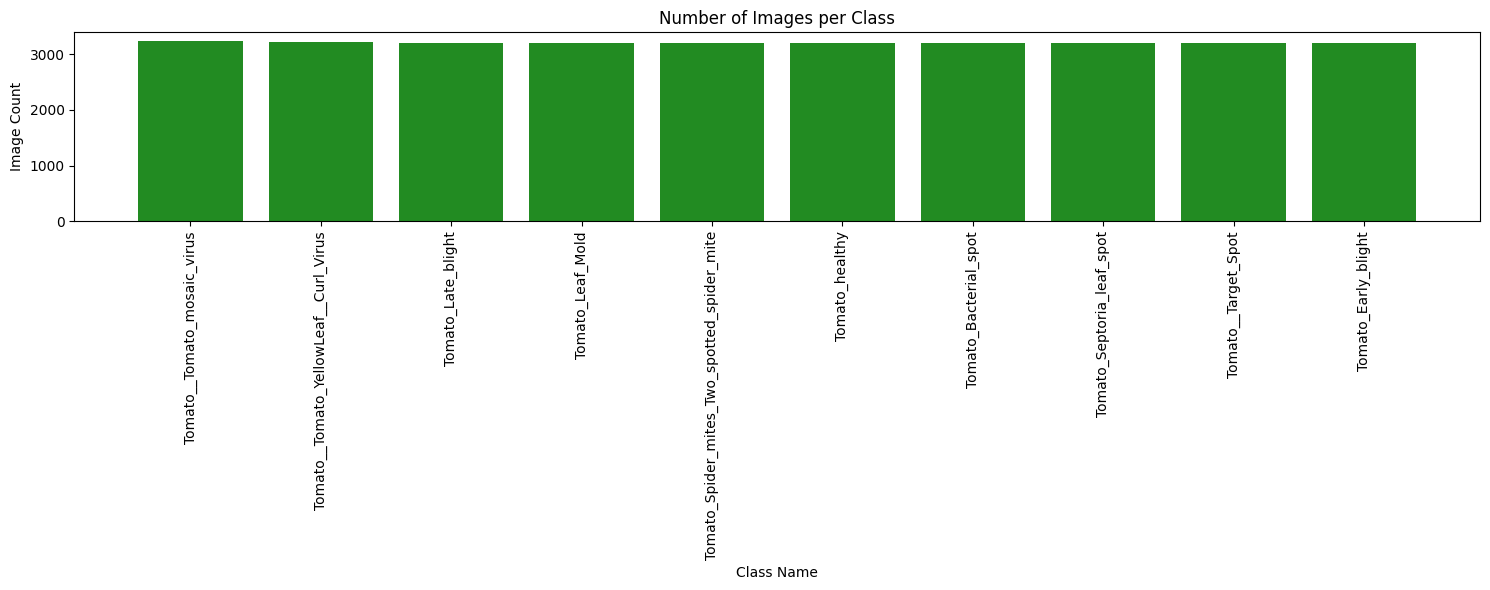

In [155]:
plt.figure(figsize=(15, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='forestgreen')
plt.xticks(rotation=90)
plt.title('Number of Images per Class')
plt.xlabel('Class Name')
plt.ylabel('Image Count')
plt.tight_layout()
plt.show()

# **Image Characteristics**

In [17]:
import cv2
import numpy as np

from collections import Counter

In [12]:
image_shapes = []
color_modes = []
file_extensions = []

In [15]:
for root, _, files in os.walk(ds):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):
            file_path = os.path.join(root, file)
            img = cv2.imread(file_path)
            if img is not None:
                # ขนาดภาพ
                h, w, c = img.shape
                image_shapes.append((w, h))
                
                # ช่องสี
                color_modes.append("RGB" if c == 3 else "Grayscale")
                
                # นามสกุลไฟล์
                ext = os.path.splitext(file)[1]
                file_extensions.append(ext)


In [18]:
shape_counts = Counter(image_shapes)
color_counts = Counter(color_modes)
ext_counts = Counter(file_extensions)

print("🔍 Image Sizes:")
for shape, count in shape_counts.items():
    print(f"{shape}: {count} images")

print("\n🎨 Color Modes:")
for mode, count in color_counts.items():
    print(f"{mode}: {count} images")

print("\n🖼️ File Extensions:")
for ext, count in ext_counts.items():
    print(f"{ext}: {count} images")

🔍 Image Sizes:
(256, 256): 156 images

🎨 Color Modes:
RGB: 156 images

🖼️ File Extensions:
.jpg: 154 images
.png: 1 images
.jpeg: 1 images


In [19]:
widths = [w for w, h in image_shapes]
heights = [h for w, h in image_shapes]

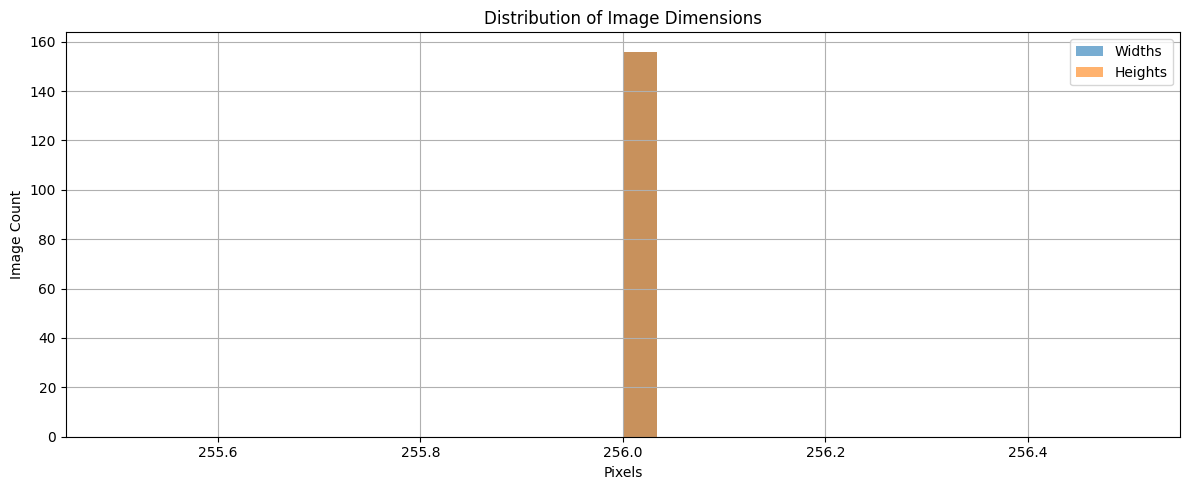

In [20]:
plt.figure(figsize=(12, 5))
plt.hist(widths, bins=30, alpha=0.6, label='Widths')
plt.hist(heights, bins=30, alpha=0.6, label='Heights')
plt.legend()
plt.title("Distribution of Image Dimensions")
plt.xlabel("Pixels")
plt.ylabel("Image Count")
plt.grid(True)
plt.tight_layout()
plt.show()

# **Data Quality**

In [156]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [157]:
blur_scores = []
dark_scores = []
noise_scores = []
bad_images = []
blurry_images_sample = []
dark_images_sample = []

In [158]:
def is_blurry(img, threshold=100.0):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    lap_var = cv2.Laplacian(gray, cv2.CV_64F)
    return lap_var < threshold, lap_var

In [159]:
def is_dark(image, threshold=50):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mean_brightness = np.mean(gray)
    return mean_brightness < threshold, mean_brightness

In [160]:
def estimate_noise(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    noise = np.std(gray)
    return noise

In [162]:
for root, dirs, files in os.walk(ds):
    if 'Potato' in root or 'Pepper' in root:
        continue

    for file in tqdm(files):
        if file.endswith(('.jpg', '.jpeg', '.png')):
            path = os.path.join(root, file)
            img = cv2.imread(path)

            if img is None:
                bad_images.append((path, 'Corrupted'))
                continue

            # Blur detection
            # blurry, score_blur = is_blurry(img)
            # blur_scores.append(score_blur)
            # if blurry:
            #     bad_images.append((path, f'Blurry: {score_blur:.2f}'))
            #     if len(blurry_images_sample) < 9:
            #         blurry_images_sample.append((img, path))

            # Dark detection
            dark, score_dark = is_dark(img)
            dark_scores.append(score_dark)
            if dark:
                bad_images.append((path, f'Dark: {score_dark:.2f}'))
                if len(dark_images_sample) < 9:
                    dark_images_sample.append((img, path))

            # Noise estimation
            score_noise = estimate_noise(img)
            noise_scores.append(score_noise)

0it [00:00, ?it/s]
100%|██████████| 3200/3200 [00:00<00:00, 2110673.50it/s]


ValueError: x must have 2 or fewer dimensions

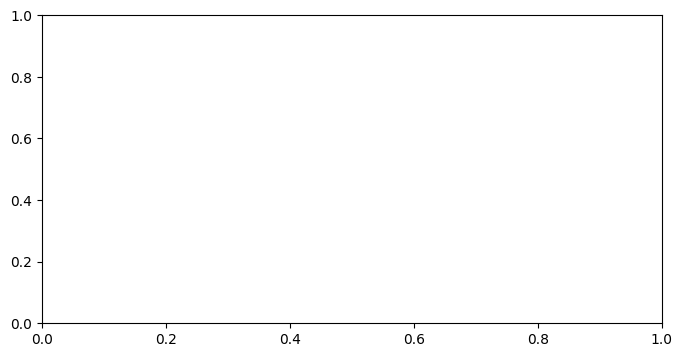

In [163]:
plt.figure(figsize=(8, 4))
plt.hist(blur_scores, bins=30, color='orange', edgecolor='black')
plt.title('Blur Score Distribution (Laplacian Variance)')
plt.xlabel('Blur Score')
plt.ylabel('Number of Images')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

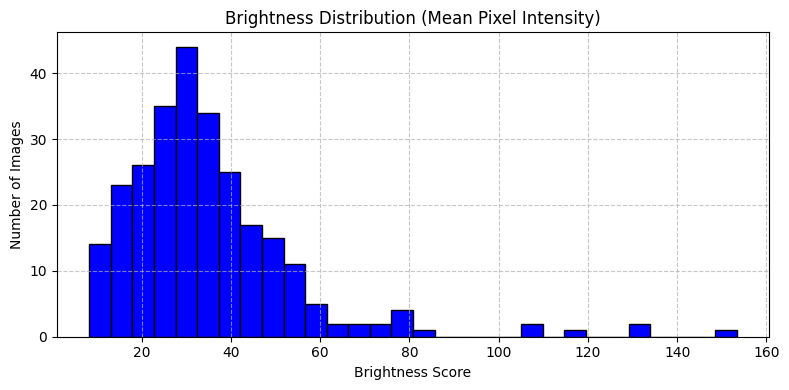

In [164]:
plt.figure(figsize=(8, 4))
plt.hist(dark_scores, bins=30, color='blue', edgecolor='black')
plt.title('Brightness Distribution (Mean Pixel Intensity)')
plt.xlabel('Brightness Score')
plt.ylabel('Number of Images')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

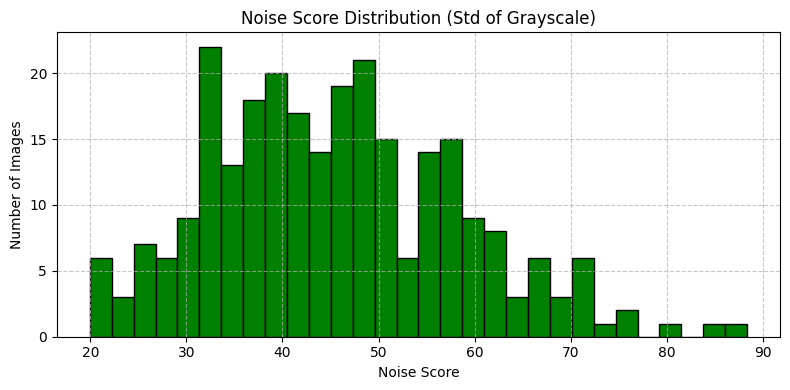

In [165]:
plt.figure(figsize=(8, 4))
plt.hist(noise_scores, bins=30, color='green', edgecolor='black')
plt.title('Noise Score Distribution (Std of Grayscale)')
plt.xlabel('Noise Score')
plt.ylabel('Number of Images')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **Train**

In [18]:
import os
import random
from PIL import Image
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torchvision.utils import save_image
from collections import defaultdict
from tqdm import tqdm
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, models
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import shutil
from torchvision.transforms.functional import to_pil_image

In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [20]:
class FilteredDataset(ImageFolder):
    def find_classes(self, directory):
        classes = [d.name for d in os.scandir(directory) if d.is_dir()]
        classes = sorted(c for c in classes if "Potato" not in c and "Pepper" not in c)
        class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
        return classes, class_to_idx

In [21]:
train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


val_test_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [22]:
dataset = FilteredDataset('/kaggle/working/plantvillage_augmented', transform=train_transform)

In [23]:
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(
    dataset, [train_size, val_size, test_size],
    generator=torch.Generator().manual_seed(42)
)

In [24]:
val_dataset.dataset.transform = val_test_transform
test_dataset.dataset.transform = val_test_transform

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

In [27]:
model = models.mobilenet_v2(pretrained=True)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, len(dataset.classes))
model = model.to(device)

In [28]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=5e-4)

In [29]:
def train(model, loader):
    model.train()
    running_loss, correct = 0.0, 0
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
        correct += (outputs.argmax(1) == labels).sum().item()
    return running_loss / len(loader.dataset), correct / len(loader.dataset)

def evaluate(model, loader):
    model.eval()
    running_loss, correct = 0.0, 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * images.size(0)
            correct += (outputs.argmax(1) == labels).sum().item()
    return running_loss / len(loader.dataset), correct / len(loader.dataset)

In [30]:
best_acc = 0.0
count_best = 0
for epoch in range(10):
    train_loss, train_acc = train(model, train_loader)
    val_loss, val_acc = evaluate(model, val_loader)

    print(f"Epoch {epoch+1}/10")
    print(f"Train Loss: {train_loss:.4f}, Accuracy: {train_acc:.4f}")
    print(f"Val   Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}")

    # Save checkpoint
    if val_acc > best_acc:
        count_best+=1
        model_name = f'/kaggle/working/best_model_{count_best}.pth'
        best_acc = val_acc
        torch.save(model.state_dict(), model_name)
        print("✅ Model checkpoint!!! ✅")
torch.save(model.state_dict(), '/kaggle/working/final_model.pth')
print("Train Success!!!")

Epoch 1/10
Train Loss: 0.2111, Accuracy: 0.9294
Val   Loss: 0.0704, Accuracy: 0.9798
✅ Model checkpoint!!! ✅
Epoch 2/10
Train Loss: 0.0933, Accuracy: 0.9691
Val   Loss: 0.0870, Accuracy: 0.9754
Epoch 3/10
Train Loss: 0.0693, Accuracy: 0.9775
Val   Loss: 0.0632, Accuracy: 0.9800
✅ Model checkpoint!!! ✅
Epoch 4/10
Train Loss: 0.0610, Accuracy: 0.9798
Val   Loss: 0.0605, Accuracy: 0.9792
Epoch 5/10
Train Loss: 0.0462, Accuracy: 0.9841
Val   Loss: 0.0683, Accuracy: 0.9781
Epoch 6/10
Train Loss: 0.0473, Accuracy: 0.9840
Val   Loss: 0.0393, Accuracy: 0.9869
✅ Model checkpoint!!! ✅
Epoch 7/10
Train Loss: 0.0443, Accuracy: 0.9853
Val   Loss: 0.0469, Accuracy: 0.9848
Epoch 8/10
Train Loss: 0.0414, Accuracy: 0.9853
Val   Loss: 0.0478, Accuracy: 0.9860
Epoch 9/10
Train Loss: 0.0507, Accuracy: 0.9839
Val   Loss: 0.0549, Accuracy: 0.9815
Epoch 10/10
Train Loss: 0.0357, Accuracy: 0.9879
Val   Loss: 0.0315, Accuracy: 0.9898
✅ Model checkpoint!!! ✅
Train Success!!!


In [34]:
model.load_state_dict(torch.load("/kaggle/working/final_model.pth", weights_only=True))
# model.load_state_dict(torch.load("/kaggle/input/aib5-models/pytorch/default/1/best_model_rn_3.pth", weights_only=True))
model.eval()

all_preds, all_labels = [], []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        preds = outputs.argmax(1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.numpy())

accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9921
Precision: 0.9922
Recall: 0.9921
F1-score: 0.9921


0 : Tomato_Bacterial_spot
1 : Tomato_Early_blight
2 : Tomato_Late_blight
3 : Tomato_Leaf_Mold
4 : Tomato_Septoria_leaf_spot
5 : Tomato_Spider_mites_Two_spotted_spider_mite
6 : Tomato__Target_Spot
7 : Tomato__Tomato_YellowLeaf__Curl_Virus
8 : Tomato__Tomato_mosaic_virus
9 : Tomato_healthy


<Figure size 1200x1000 with 0 Axes>

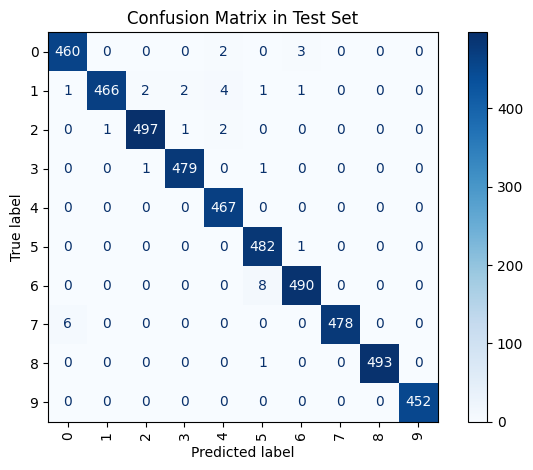

In [33]:
for idx, class_name in enumerate(dataset.classes, 0):
    print(f"{idx} : {class_name}")

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(12, 10))
disp.plot(xticks_rotation=90, cmap='Blues')
plt.title("Confusion Matrix in Test Set")
plt.tight_layout()
plt.show()

# **Augmentation**

In [12]:
DATA_DIR = "/kaggle/input/plantdisease/PlantVillage"
AUGMENTED_DIR = "/kaggle/working/plantvillage_augmented"
AUG_THRESHOLD = 3200
EXCLUDED_CLASSES = ['Potato', 'Pepper']

In [13]:
augmentation_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.2),
    transforms.RandomResizedCrop(256, scale=(0.8, 1.0)),
    transforms.ToTensor()
])

In [14]:
def should_skip_class(class_name):
    return any(ex in class_name for ex in EXCLUDED_CLASSES)

In [15]:
class_counts = defaultdict(int)
for class_name in os.listdir(DATA_DIR):
    class_path = os.path.join(DATA_DIR, class_name)
    if not os.path.isdir(class_path) or should_skip_class(class_name):
        continue
    for file in os.listdir(class_path):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            class_counts[class_name] += 1

In [16]:
for class_name, count in class_counts.items():
    input_path = os.path.join(DATA_DIR, class_name)
    output_path = os.path.join(AUGMENTED_DIR, class_name)
    os.makedirs(output_path, exist_ok=True)
    for file in os.listdir(input_path):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            shutil.copy(os.path.join(input_path, file), os.path.join(output_path, file))

In [17]:
for class_name, count in tqdm(class_counts.items(), desc="Augmenting classes"):
    if count >= AUG_THRESHOLD or should_skip_class(class_name):
        continue

    input_path = os.path.join(DATA_DIR, class_name)
    output_path = os.path.join(AUGMENTED_DIR, class_name)

    images = [f for f in os.listdir(input_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    num_to_generate = AUG_THRESHOLD - count

    for i in range(num_to_generate):
        img_name = random.choice(images)
        img_path = os.path.join(input_path, img_name)
        img = Image.open(img_path).convert("RGB")
        augmented = augmentation_transform(img)

        aug_name = f"aug_{i}_{img_name}"
        aug_path = os.path.join(output_path, aug_name)
        augmented_pil = to_pil_image(augmented)
        augmented_pil.save(aug_path)

print("✅ Data augmentation completed.")

Augmenting classes: 100%|██████████| 10/10 [02:31<00:00, 15.12s/it]

✅ Data augmentation completed.
